In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testing/test.csv
/kaggle/input/training/train.csv


In [2]:
train=pd.read_csv('/kaggle/input/training/train.csv')
test=pd.read_csv('/kaggle/input/testing/test.csv')

In [3]:
train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

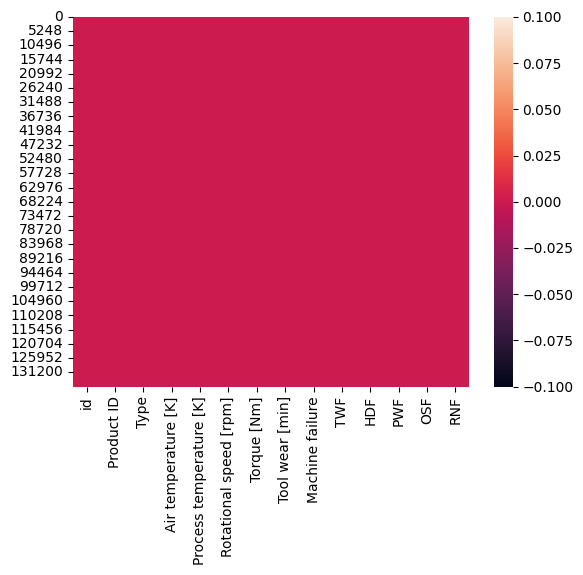

In [6]:
sns.heatmap(train.isnull())

<Axes: >

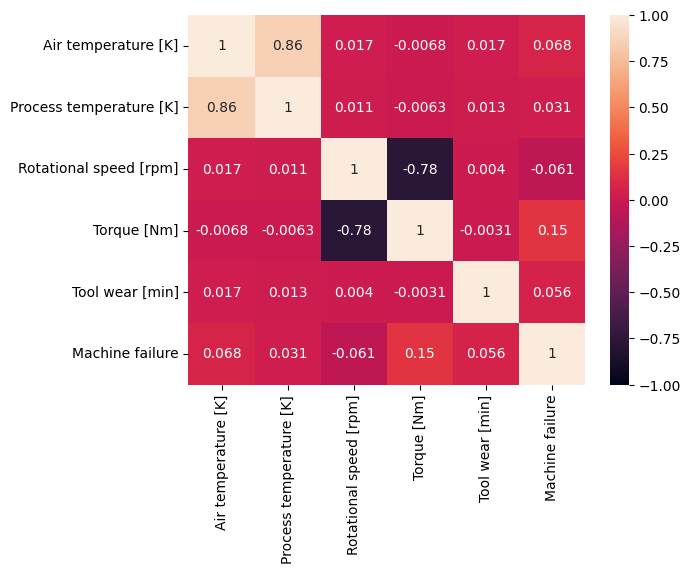

In [7]:
tt= train[["Air temperature [K]" ,"Process temperature [K]","Rotational speed [rpm]",
        "Torque [Nm]","Tool wear [min]","Machine failure"]]
tt_corr = tt.corr()
sns.heatmap(tt_corr,vmin=-1 , vmax=1, annot=True)

<Axes: xlabel='Type', ylabel='count'>

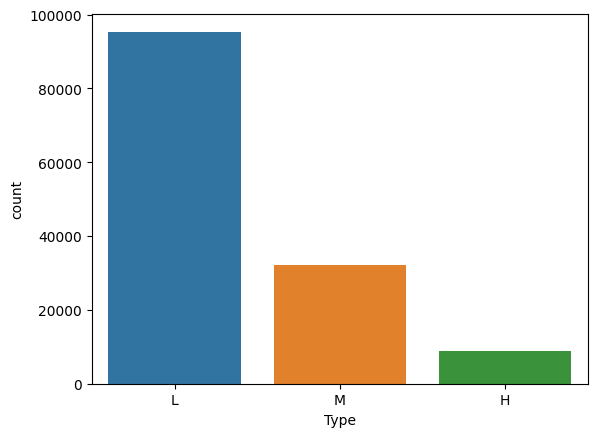

In [8]:
sns.countplot(x="Type", data=train)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

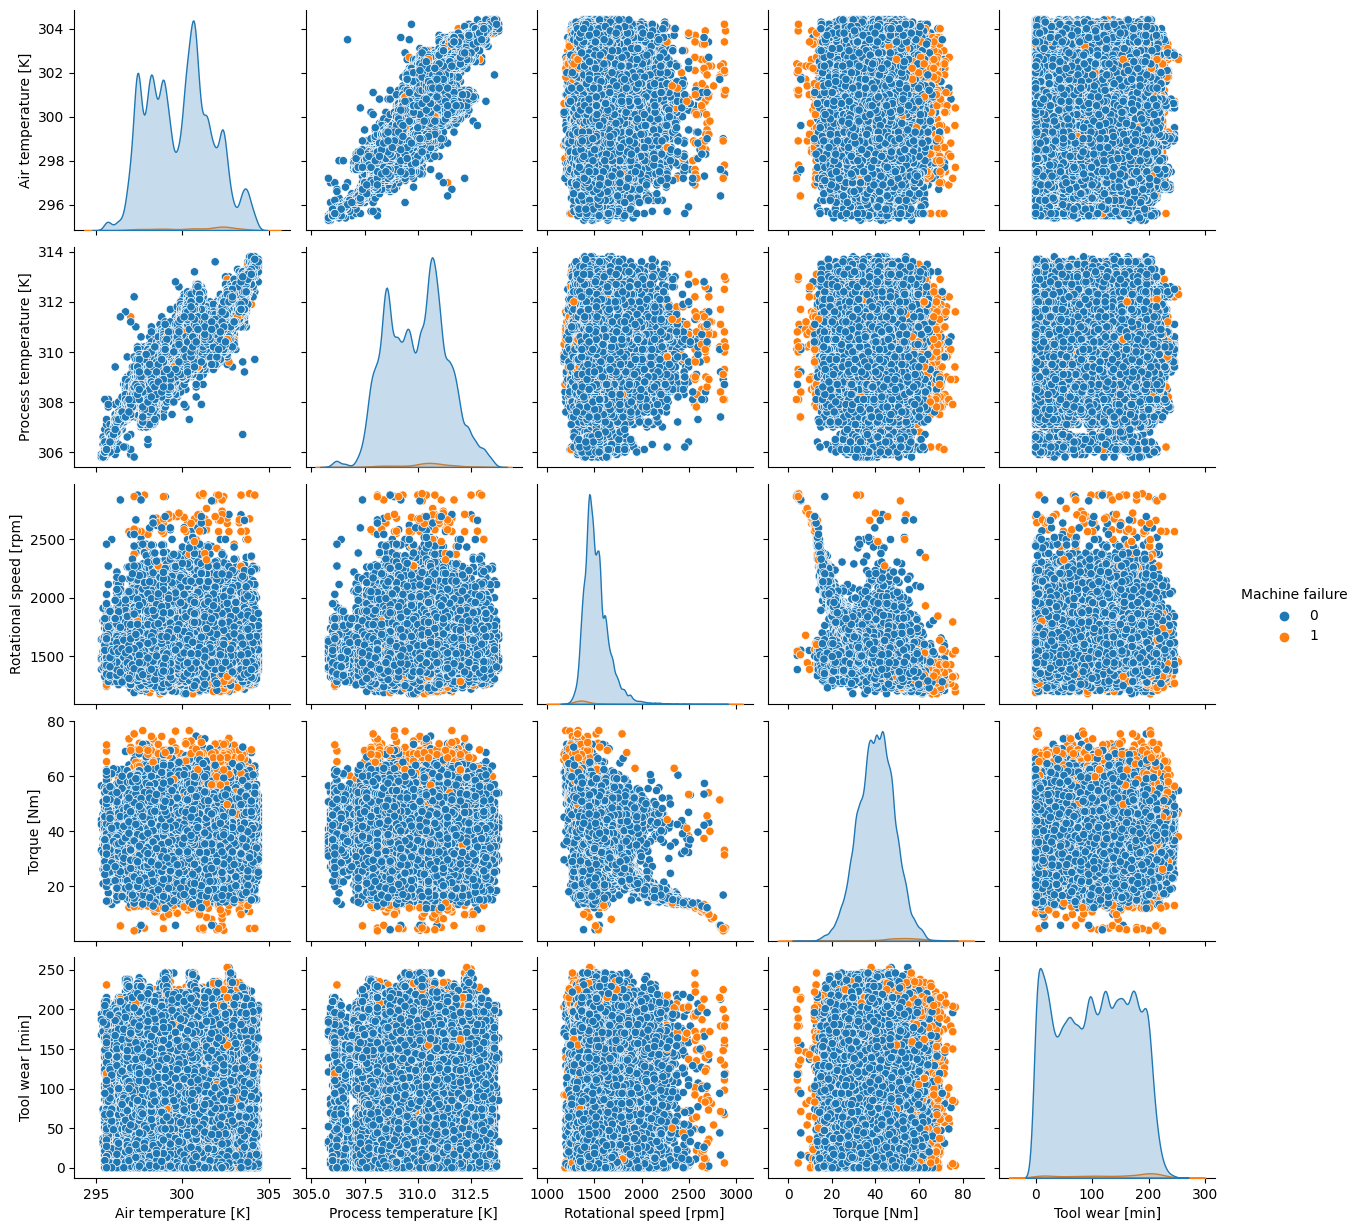

In [9]:
tt= train[["Air temperature [K]" ,"Process temperature [K]","Rotational speed [rpm]",
        "Torque [Nm]","Tool wear [min]","Machine failure"]]
sns.pairplot(tt ,hue="Machine failure")

In [10]:
types=pd.get_dummies(train['Type'], drop_first=False)
types.head()

,H,L,M
0,False,True,False
1,False,False,True
2,False,True,False
3,False,True,False
4,False,False,True


In [11]:
mapping_boolean = {True: 1, False: 0}
types['H'] = types['H'].map(mapping_boolean)
types['L'] = types['L'].map(mapping_boolean)
types['M'] = types['M'].map(mapping_boolean)
types.head()

,H,L,M
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [12]:
train=pd.concat([train,types], axis=1)
train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1


In [13]:
train.drop(['id', 'Product ID', 'Type'], axis=1, inplace=True)
train.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1


In [14]:
types=pd.get_dummies(test['Type'], drop_first=False)
# types.head()
types['H'] = types['H'].map({True: 1, False: 0})
types['L'] = types['L'].map({True: 1, False: 0})
types['M'] = types['M'].map({True: 1, False: 0})
types.head()


,H,L,M
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1


In [15]:
test=pd.concat([test,types], axis=1)
# test.head()
test.drop(['id', 'Product ID', 'Type'], axis=1, inplace=True)
test.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,H,L,M
0,302.3,311.5,1499,38.0,60,0,0,0,0,0,0,1,0
1,301.7,311.0,1713,28.8,17,0,0,0,0,0,0,1,0
2,301.3,310.4,1525,37.7,96,0,0,0,0,0,0,1,0
3,300.1,309.6,1479,47.6,5,0,0,0,0,0,0,0,1
4,303.4,312.3,1515,41.3,114,0,0,0,0,0,0,0,1


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.metrics import recall_score , f1_score , precision_score ,roc_auc_score   ,accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

In [17]:
std =StandardScaler()
test_data_scale = std.fit_transform(test)
test_data_scale

array([[ 1.31383019,  1.12657041, -0.15380605, ..., -0.26530561,
         0.65859421, -0.55697187],
       [ 0.99082435,  0.76563472,  1.37509682, ..., -0.26530561,
         0.65859421, -0.55697187],
       [ 0.77548712,  0.33251188,  0.0319485 , ..., -0.26530561,
         0.65859421, -0.55697187],
       ...,
       [-2.29306839, -2.69934797, -0.13951724, ..., -0.26530561,
         0.65859421, -0.55697187],
       [-0.94721071, -1.54435374,  0.09624816, ..., -0.26530561,
         0.65859421, -0.55697187],
       [ 1.95984188,  2.06500322,  0.09624816, ..., -0.26530561,
         0.65859421, -0.55697187]])

In [18]:
y=train["Machine failure"]
std =StandardScaler()
train_data_scale = std.fit_transform(train.drop("Machine failure" , axis =1))
train_data_scale

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.26453926,
         0.65632558, -0.55527706],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.26453926,
        -1.52363406,  1.80090278],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.26453926,
         0.65632558, -0.55527706],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.26453926,
         0.65632558, -0.55527706],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.26453926,
         0.65632558, -0.55527706],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.26453926,
         0.65632558, -0.55527706]])

In [19]:
y=train['Machine failure']
train.drop(['Machine failure'], axis=1, inplace=True)

In [20]:
model2 = XGBClassifier(n_estimators=10 ,max_depth=3)
model2.fit(train_data_scale,y)
y_predict_train = model2.predict(train_data_scale)
accuracy_score(y,y_predict_train)

0.9961371849093668

In [21]:
y_predict_test = model2.predict(test_data_scale)
# Print the first 10 indices and predicted values where the output is 1
print("First 10 indices and predicted values where the output is 1:")
count = 0
for i, prediction in enumerate(y_predict_test):
    if prediction == 1:
        print(f"Index {i}: {prediction}")
        count += 1
    if count >= 10:
        break
        
# Print the first 10 indices and predicted values where the output is 1
print("First 10 indices and predicted values where the output is 0:")
count = 0
for i, prediction in enumerate(y_predict_test):
    if prediction == 0:
        print(f"Index {i}: {prediction}")
        count += 1
    if count >= 10:
        break


First 10 indices and predicted values where the output is 1:
Index 17: 1
Index 209: 1
Index 405: 1
Index 576: 1
Index 950: 1
Index 1380: 1
Index 1570: 1
Index 1787: 1
Index 2291: 1
Index 2345: 1
First 10 indices and predicted values where the output is 0:
Index 0: 0
Index 1: 0
Index 2: 0
Index 3: 0
Index 4: 0
Index 5: 0
Index 6: 0
Index 7: 0
Index 8: 0
Index 9: 0


In [22]:
total_ones = sum(y_predict_test == 1)
total_records = len(y_predict_test)
percent_ones = (total_ones / total_records) * 100

print(f"Total number of records: {total_records}")
print(f"Total number of Machine Failures in the predicted output: {total_ones}")
print(f"Percentage of Machine Failures in the predicted output: {percent_ones:.2f}%")

Total number of records: 90954
Total number of Machine Failures in the predicted output: 650
Percentage of Machine Failures in the predicted output: 0.71%
